In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("Data/train.csv")

## Variable Description
### Item_Identifier ---- Unique product ID
### Item_Weight ---- Weight of product
### Item_Fat_Content ---- Whether the product is low fat or not
### Item_Visibility ---- The % of the total display area of all products in a store allocated to the particular product
### Item_Type ---- The category to which the product belongs
### Item_MRP ---- Maximum Retail Price (list price) of the product
### Outlet_Identifier ---- Unique store ID
### Outlet_Establishment_Year ---- The year in which the store was established
### Outlet_Size ---- The size of the store in terms of ground area covered
### Outlet_Location_Type ---- The type of city in which the store is located
### *Outlet_Type ---- Whether the outlet is just a grocery store or some sort of supermarket
### Item_Outlet_Sales ---- sales of the product in t particular store. This is the outcome variable to be predicted.

In [7]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
BigMart Sales Data - Comprehensive Exploratory Data Analysis (EDA)
================================================================

This script performs comprehensive EDA on the BigMart sales dataset to understand
the properties of products and outlets that influence sales performance.

Dataset: BigMart Sales Data (train.csv)
Target Variable: Item_Outlet_Sales

Author: Data Analysis Script
Date: August 2025
"""

# =============================================================================
# IMPORTS
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

# =============================================================================
# CONFIGURATION
# =============================================================================
# File path
DATA_FILE = 'Data/train.csv'
TARGET_COLUMN = 'Item_Outlet_Sales'  # Target variable for prediction

# Plot configuration
FIGSIZE = (12, 6)
PLOTLY_TEMPLATE = 'plotly_white'

# =============================================================================
# UTILITY FUNCTIONS
# =============================================================================

def load_and_inspect_data(filepath):
    """
    Load dataset and display basic information about its structure.
    
    Parameters:
    -----------
    filepath : str
        Path to the CSV file
        
    Returns:
    --------
    pd.DataFrame
        Loaded dataset
    """
    print("=" * 80)
    print("DATASET LOADING AND BASIC INSPECTION")
    print("=" * 80)
    
    # Load the dataset
    df = pd.read_csv(filepath)
    
    # Basic info
    print(f"Dataset Shape: {df.shape}")
    print(f"Number of rows: {df.shape[0]:,}")
    print(f"Number of columns: {df.shape[1]}")
    print("\n" + "-" * 50)
    
    # Display first few rows
    print("First 5 rows:")
    print(df.head())
    print("\n" + "-" * 50)
    
    # Data types and memory usage
    print("Data Types and Memory Usage:")
    print(df.info())
    print("\n" + "-" * 50)
    
    # Column names
    print("Column Names:")
    for i, col in enumerate(df.columns, 1):
        print(f"{i:2d}. {col}")
    
    return df

def analyze_missing_values(df):
    """
    Analyze and visualize missing values in the dataset.
    
    Parameters:
    -----------
    df : pd.DataFrame
        Input dataset
    """
    print("\n" + "=" * 80)
    print("MISSING VALUES ANALYSIS")
    print("=" * 80)
    
    # Calculate missing values
    missing_data = pd.DataFrame({
        'Missing_Count': df.isnull().sum(),
        'Missing_Percentage': (df.isnull().sum() / len(df)) * 100
    })
    missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
    
    if len(missing_data) > 0:
        print("Missing Values Summary:")
        print(missing_data)
        
        # Visualize missing values
        plt.figure(figsize=(10, 6))
        sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
        plt.title('Missing Values Heatmap')
        plt.tight_layout()
        plt.show()
        
        # Bar plot of missing values
        if len(missing_data) > 0:
            plt.figure(figsize=(10, 6))
            missing_data['Missing_Percentage'].plot(kind='bar')
            plt.title('Missing Values Percentage by Column')
            plt.ylabel('Percentage Missing (%)')
            plt.xlabel('Columns')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
    else:
        print("No missing values found in the dataset!")

def get_summary_statistics(df):
    """
    Generate summary statistics for numerical and categorical columns.
    
    Parameters:
    -----------
    df : pd.DataFrame
        Input dataset
    """
    print("\n" + "=" * 80)
    print("SUMMARY STATISTICS")
    print("=" * 80)
    
    # Separate numerical and categorical columns
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    
    print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")
    print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")
    print("\n" + "-" * 50)
    
    # Numerical summary
    if numerical_cols:
        print("NUMERICAL COLUMNS SUMMARY:")
        print(df[numerical_cols].describe())
        print("\n" + "-" * 50)
    
    # Categorical summary
    if categorical_cols:
        print("CATEGORICAL COLUMNS SUMMARY:")
        for col in categorical_cols:
            print(f"\n{col}:")
            print(f"Unique values: {df[col].nunique()}")
            print("Value counts:")
            print(df[col].value_counts().head(10))
            print("-" * 30)

def plot_numerical_distributions(df):
    """
    Plot histograms and KDE plots for all numerical columns.
    
    Parameters:
    -----------
    df : pd.DataFrame
        Input dataset
    """
    print("\n" + "=" * 80)
    print("NUMERICAL VARIABLES DISTRIBUTION ANALYSIS")
    print("=" * 80)
    
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    if not numerical_cols:
        print("No numerical columns found!")
        return
    
    # Calculate number of rows and columns for subplots
    n_cols = min(3, len(numerical_cols))
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
    
    # Create subplots for histograms
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    if n_rows == 1:
        axes = [axes] if n_cols == 1 else axes
    else:
        axes = axes.flatten()
    
    for i, col in enumerate(numerical_cols):
        # Histogram with KDE
        sns.histplot(data=df, x=col, kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].tick_params(axis='x', rotation=45)
    
    # Hide unused subplots
    for i in range(len(numerical_cols), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    # Box plots for outlier detection
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    if n_rows == 1:
        axes = [axes] if n_cols == 1 else axes
    else:
        axes = axes.flatten()
    
    for i, col in enumerate(numerical_cols):
        sns.boxplot(data=df, y=col, ax=axes[i])
        axes[i].set_title(f'Box Plot of {col}')
    
    # Hide unused subplots
    for i in range(len(numerical_cols), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

def plot_categorical_distributions(df):
    """
    Generate count plots for categorical variables.
    
    Parameters:
    -----------
    df : pd.DataFrame
        Input dataset
    """
    print("\n" + "=" * 80)
    print("CATEGORICAL VARIABLES DISTRIBUTION ANALYSIS")
    print("=" * 80)
    
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    
    if not categorical_cols:
        print("No categorical columns found!")
        return
    
    for col in categorical_cols:
        plt.figure(figsize=(12, 6))
        
        # Count plot
        order = df[col].value_counts().index
        sns.countplot(data=df, x=col, order=order)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
        # Print value counts
        print(f"\n{col} - Value Counts:")
        print(df[col].value_counts())
        print("-" * 50)

def analyze_correlations(df):
    """
    Analyze and visualize correlations between numerical variables.
    
    Parameters:
    -----------
    df : pd.DataFrame
        Input dataset
    """
    print("\n" + "=" * 80)
    print("CORRELATION ANALYSIS")
    print("=" * 80)
    
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    if len(numerical_cols) < 2:
        print("Not enough numerical columns for correlation analysis!")
        return
    
    # Calculate correlation matrix
    corr_matrix = df[numerical_cols].corr()
    
    # Display correlation matrix
    print("Correlation Matrix:")
    print(corr_matrix.round(3))
    
    # Heatmap
    plt.figure(figsize=(10, 8))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, mask=mask, cbar_kws={"shrink": .8})
    plt.title('Correlation Matrix Heatmap')
    plt.tight_layout()
    plt.show()
    
    # Find highly correlated pairs
    threshold = 0.5
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                high_corr_pairs.append({
                    'Variable_1': corr_matrix.columns[i],
                    'Variable_2': corr_matrix.columns[j],
                    'Correlation': corr_matrix.iloc[i, j]
                })
    
    if high_corr_pairs:
        print(f"\nHighly correlated pairs (|correlation| > {threshold}):")
        for pair in high_corr_pairs:
            print(f"{pair['Variable_1']} <-> {pair['Variable_2']}: {pair['Correlation']:.3f}")
    
    # Pairplot for numerical variables (limit to avoid overcrowding)
    if len(numerical_cols) <= 6:
        sns.pairplot(df[numerical_cols])
        plt.suptitle('Pairplot of Numerical Variables', y=1.02)
        plt.show()
    else:
        print(f"\nSkipping pairplot (too many numerical columns: {len(numerical_cols)})")

def analyze_target_variable(df, target_col):
    """
    Analyze the target variable and its relationships with other features.
    
    Parameters:
    -----------
    df : pd.DataFrame
        Input dataset
    target_col : str
        Name of the target column
    """
    print("\n" + "=" * 80)
    print(f"TARGET VARIABLE ANALYSIS: {target_col}")
    print("=" * 80)
    
    if target_col not in df.columns:
        print(f"Target column '{target_col}' not found in dataset!")
        return
    
    # Basic statistics of target variable
    print("Target Variable Statistics:")
    print(df[target_col].describe())
    
    # Distribution of target variable
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    sns.histplot(df[target_col], kde=True)
    plt.title(f'Distribution of {target_col}')
    
    plt.subplot(1, 3, 2)
    sns.boxplot(y=df[target_col])
    plt.title(f'Box Plot of {target_col}')
    
    plt.subplot(1, 3, 3)
    from scipy import stats
    stats.probplot(df[target_col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {target_col}')
    
    plt.tight_layout()
    plt.show()
    
    # Relationship with categorical variables
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    
    for col in categorical_cols:
        if df[col].nunique() <= 20:  # Only for columns with reasonable number of categories
            plt.figure(figsize=(12, 6))
            sns.boxplot(data=df, x=col, y=target_col)
            plt.title(f'{target_col} by {col}')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

def detect_outliers(df):
    """
    Detect and visualize outliers using IQR method.
    
    Parameters:
    -----------
    df : pd.DataFrame
        Input dataset
    """
    print("\n" + "=" * 80)
    print("OUTLIER DETECTION")
    print("=" * 80)
    
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    outlier_summary = []
    
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_count = len(outliers)
        outlier_percentage = (outlier_count / len(df)) * 100
        
        outlier_summary.append({
            'Column': col,
            'Outlier_Count': outlier_count,
            'Outlier_Percentage': outlier_percentage,
            'Lower_Bound': lower_bound,
            'Upper_Bound': upper_bound
        })
    
    # Display outlier summary
    outlier_df = pd.DataFrame(outlier_summary)
    print("Outlier Summary (using IQR method):")
    print(outlier_df)

def create_interactive_plots(df, target_col):
    """
    Create interactive plots using Plotly.
    
    Parameters:
    -----------
    df : pd.DataFrame
        Input dataset
    target_col : str
        Name of the target column
    """
    print("\n" + "=" * 80)
    print("INTERACTIVE VISUALIZATIONS")
    print("=" * 80)
    
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    
    # Interactive scatter matrix for numerical variables
    if len(numerical_cols) >= 2:
        fig = px.scatter_matrix(df, dimensions=numerical_cols[:5], 
                               title="Interactive Scatter Matrix")
        fig.update_layout(template=PLOTLY_TEMPLATE)
        fig.show()
    
    # Interactive box plots for categorical vs target
    if target_col in df.columns and categorical_cols:
        for col in categorical_cols[:3]:  # Limit to first 3 categorical columns
            if df[col].nunique() <= 10:
                fig = px.box(df, x=col, y=target_col, 
                           title=f'{target_col} by {col}')
                fig.update_layout(template=PLOTLY_TEMPLATE)
                fig.show()
    
    # Interactive correlation heatmap
    if len(numerical_cols) >= 2:
        corr_matrix = df[numerical_cols].corr()
        fig = go.Figure(data=go.Heatmap(
            z=corr_matrix.values,
            x=corr_matrix.columns,
            y=corr_matrix.columns,
            colorscale='RdBu',
            zmid=0
        ))
        fig.update_layout(
            title='Interactive Correlation Heatmap',
            template=PLOTLY_TEMPLATE
        )
        fig.show()



In [8]:

# Step 1: Load and inspect data
df = load_and_inspect_data(DATA_FILE)

DATASET LOADING AND BASIC INSPECTION
Dataset Shape: (8523, 12)
Number of rows: 8,523
Number of columns: 12

--------------------------------------------------
First 5 rows:
  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0               


MISSING VALUES ANALYSIS
Missing Values Summary:
             Missing_Count  Missing_Percentage
Outlet_Size           2410           28.276428
Item_Weight           1463           17.165317


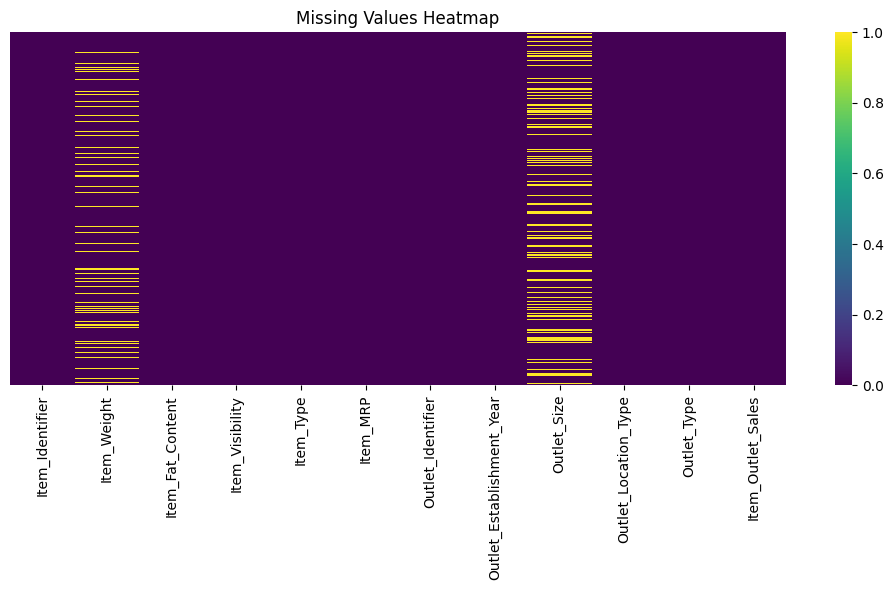

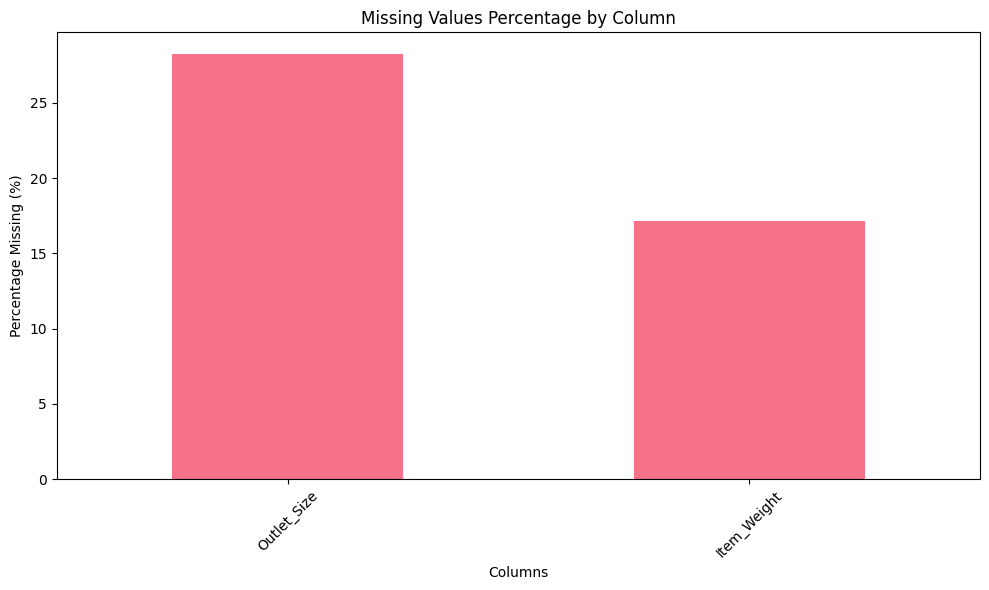

In [9]:
# Step 2: Analyze missing values
analyze_missing_values(df)

In [10]:
# Step 3: Generate summary statistics
get_summary_statistics(df)


SUMMARY STATISTICS
Numerical columns (5): ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
Categorical columns (7): ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

--------------------------------------------------
NUMERICAL COLUMNS SUMMARY:
       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000


NUMERICAL VARIABLES DISTRIBUTION ANALYSIS


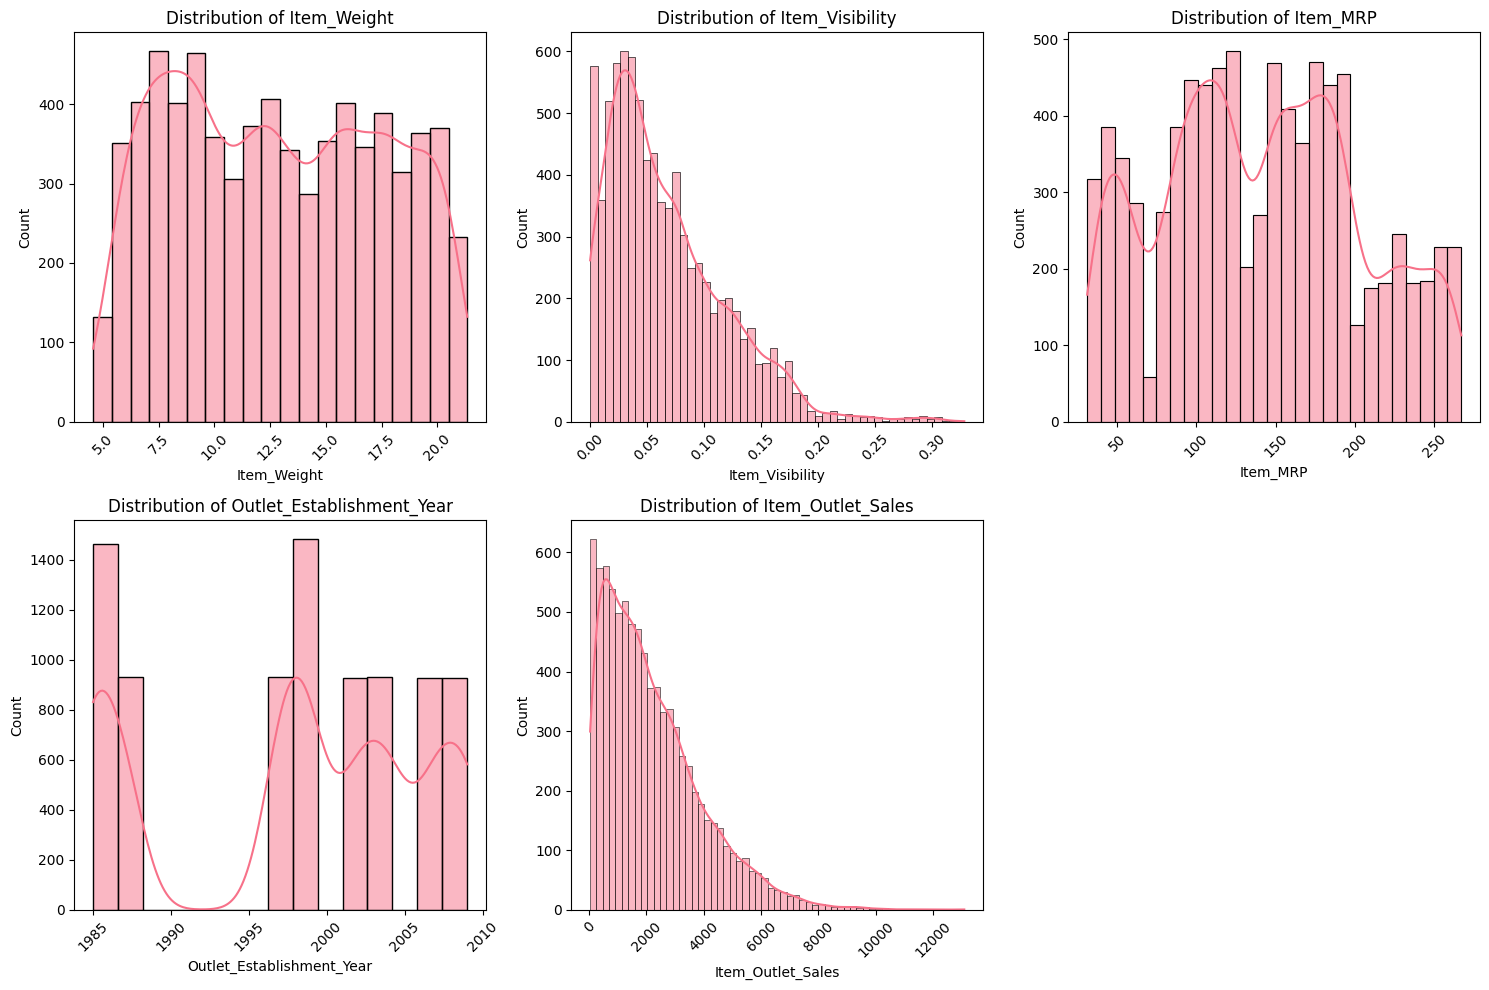

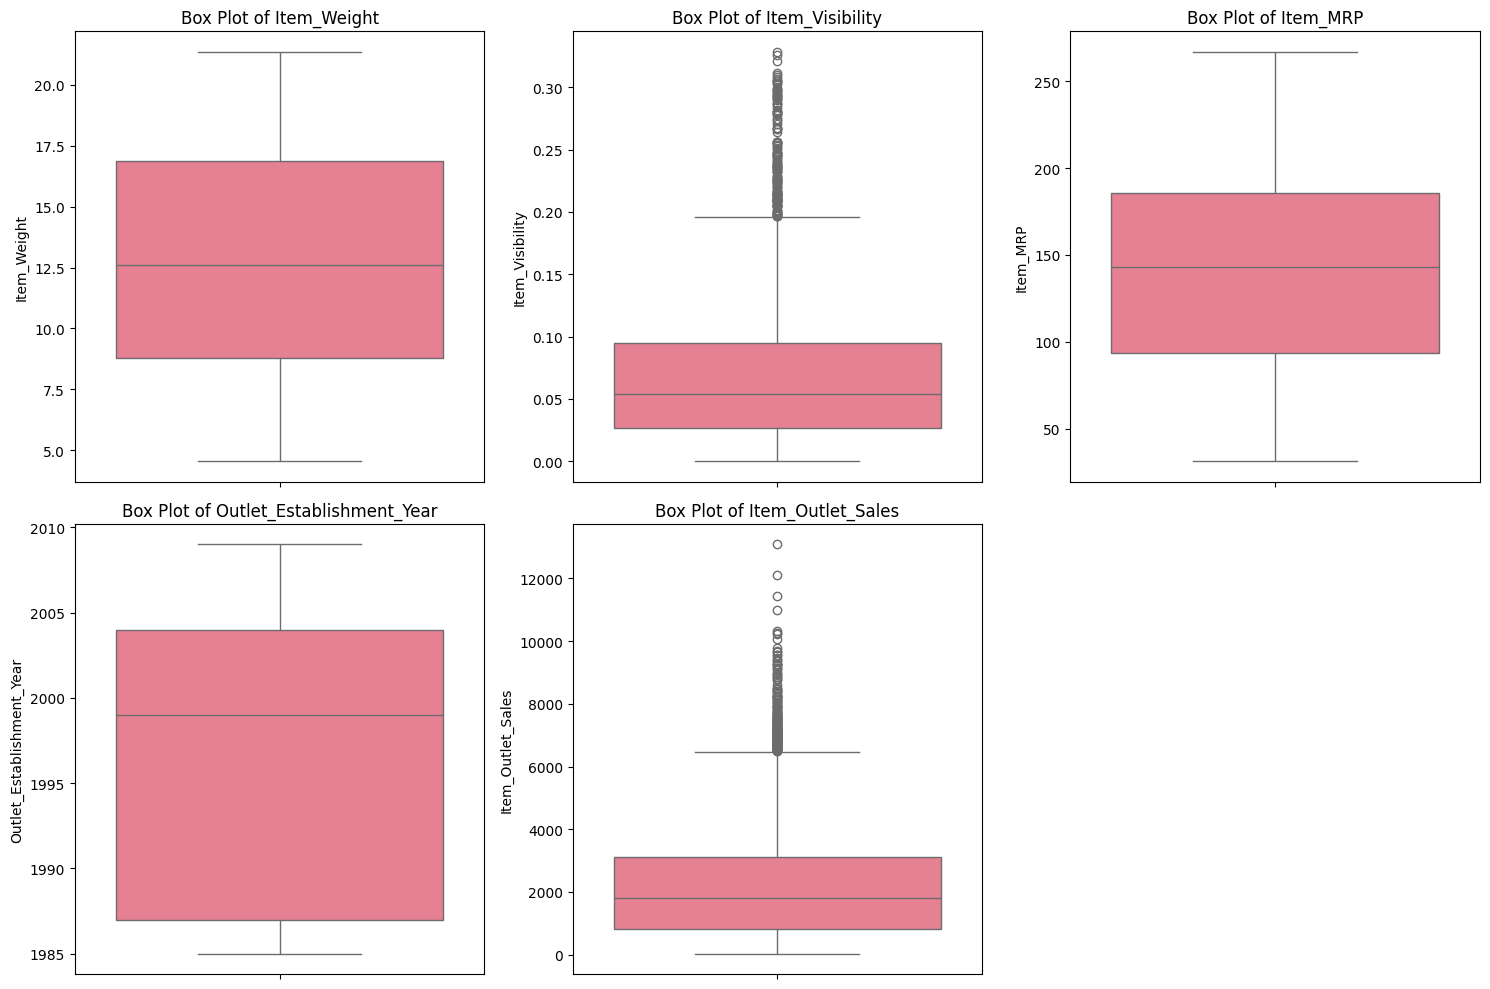

In [11]:
# Step 4: Plot numerical distributions
plot_numerical_distributions(df)


CATEGORICAL VARIABLES DISTRIBUTION ANALYSIS


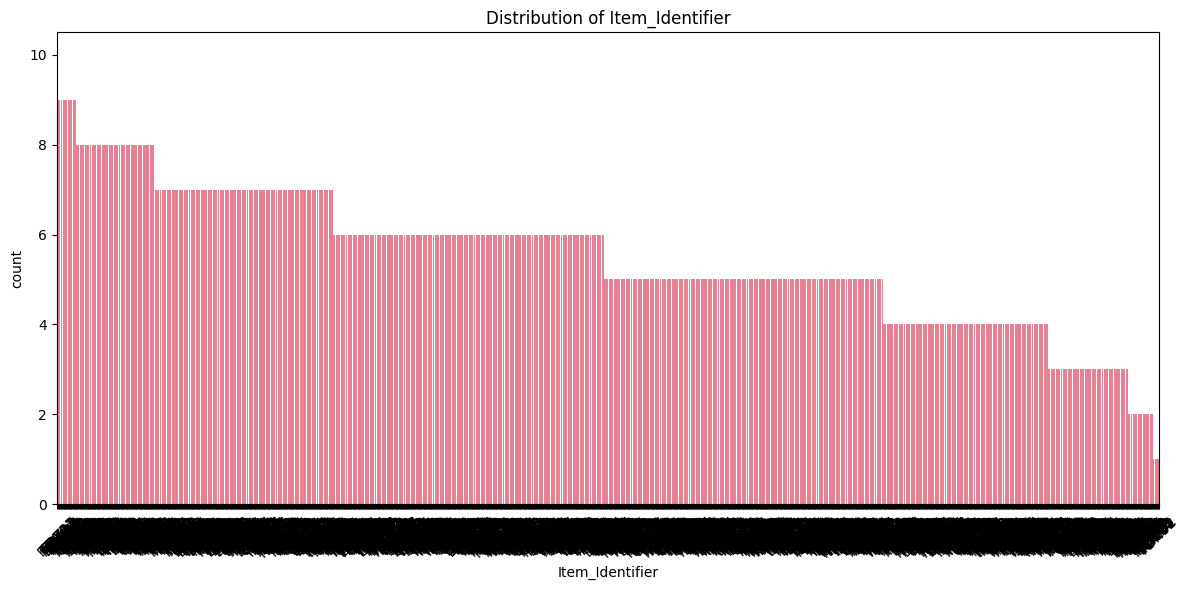


Item_Identifier - Value Counts:
Item_Identifier
FDW13    10
FDG33    10
FDX31     9
FDT07     9
NCY18     9
         ..
FDO33     1
FDK57     1
FDT35     1
FDN52     1
FDE52     1
Name: count, Length: 1559, dtype: int64
--------------------------------------------------


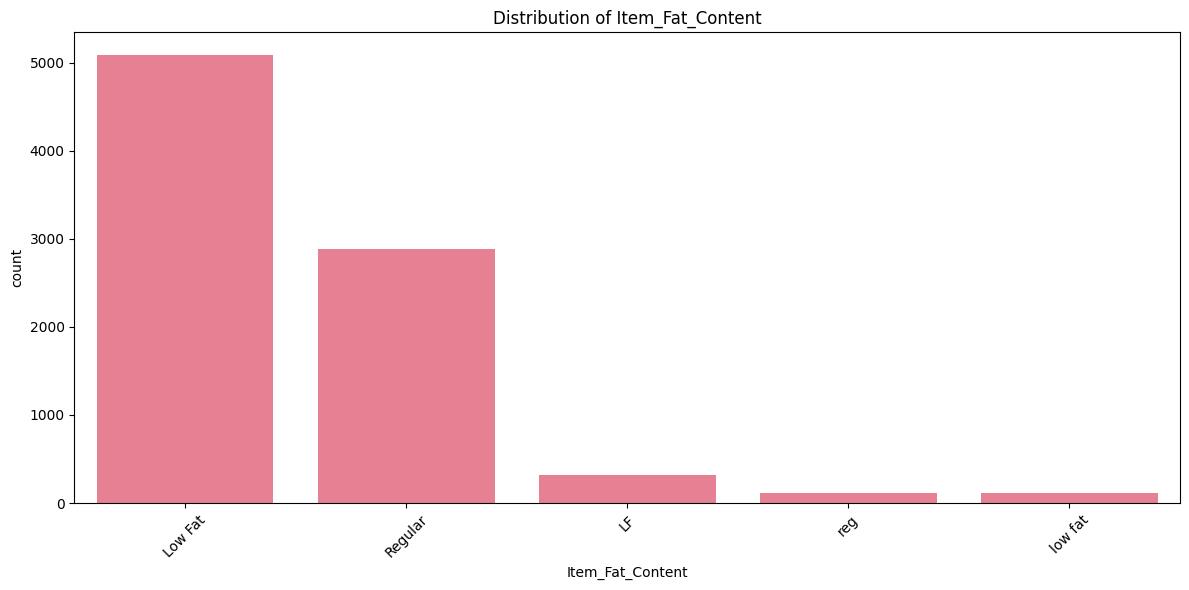


Item_Fat_Content - Value Counts:
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64
--------------------------------------------------


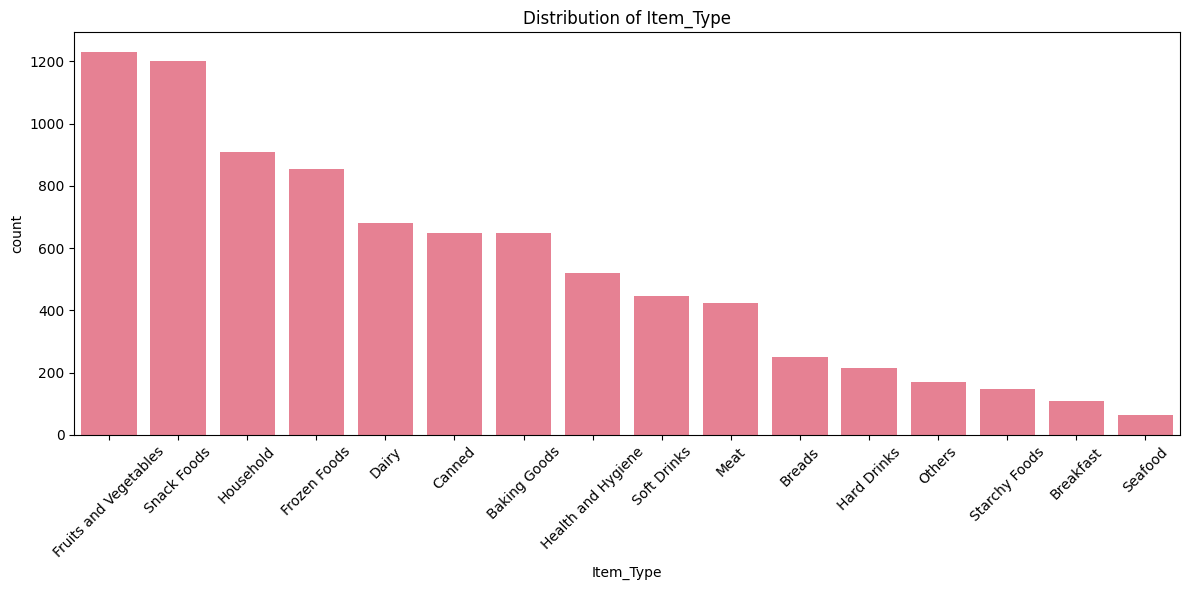


Item_Type - Value Counts:
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64
--------------------------------------------------


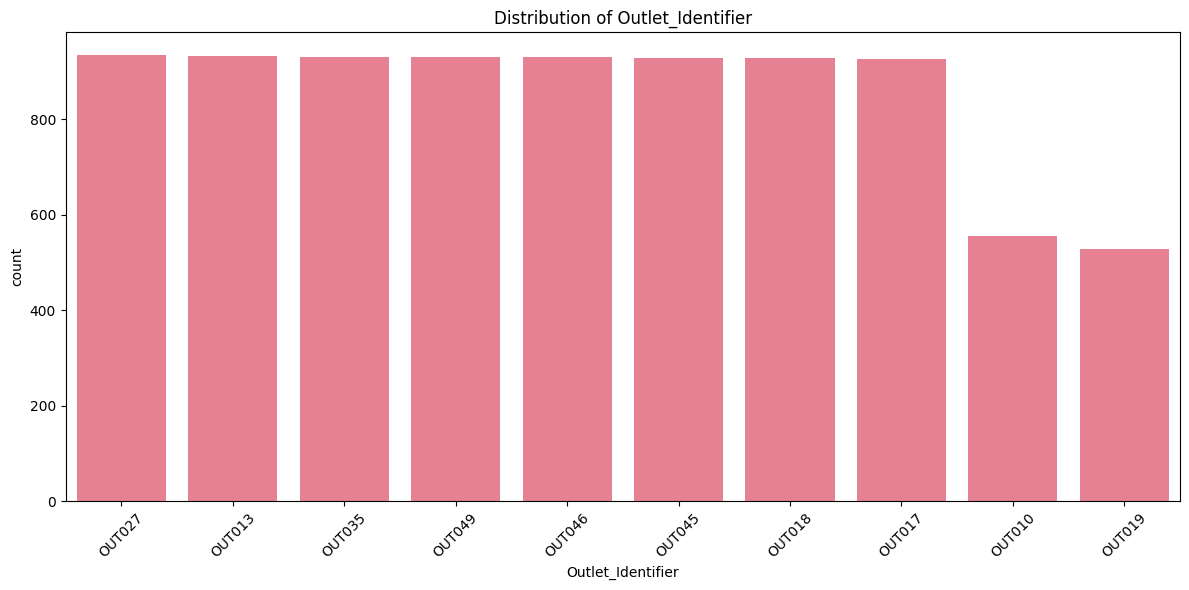


Outlet_Identifier - Value Counts:
Outlet_Identifier
OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64
--------------------------------------------------


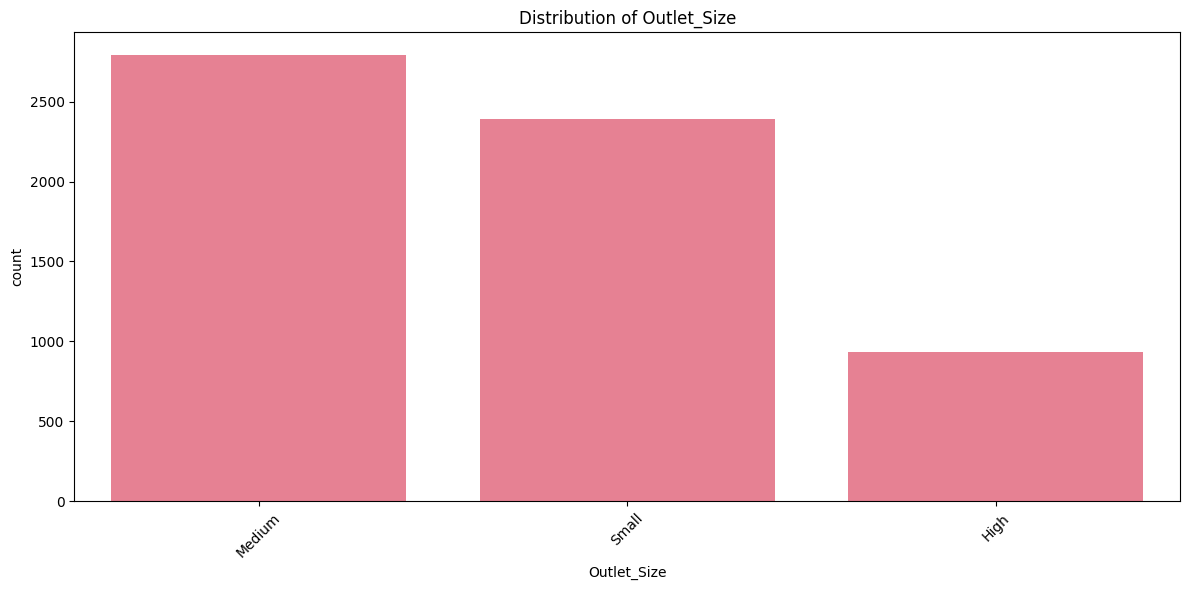


Outlet_Size - Value Counts:
Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64
--------------------------------------------------


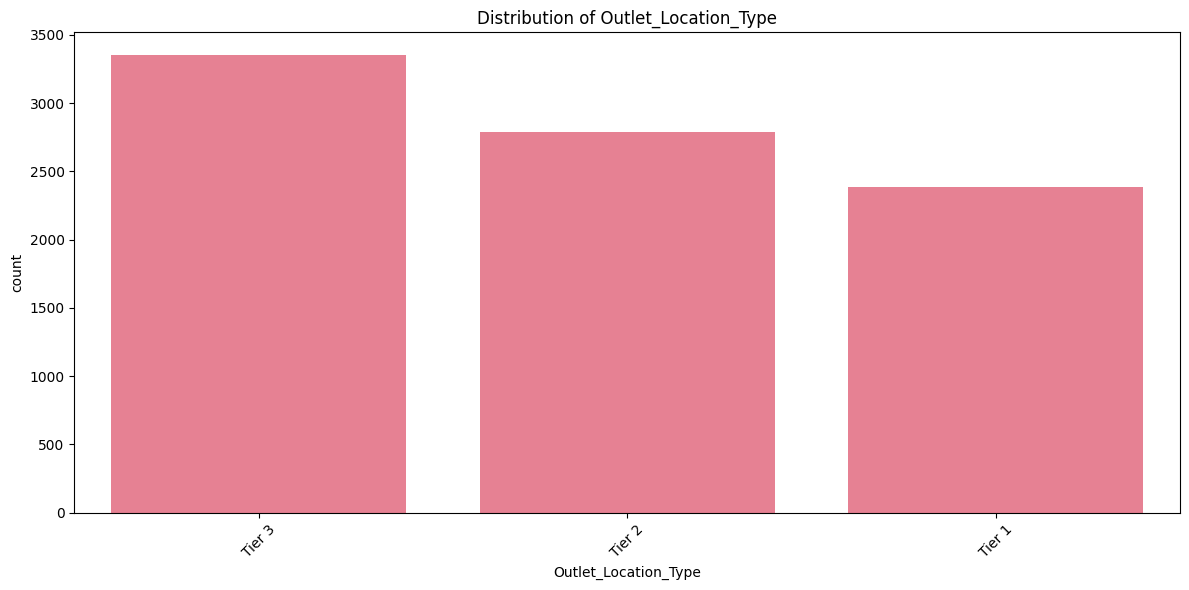


Outlet_Location_Type - Value Counts:
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64
--------------------------------------------------


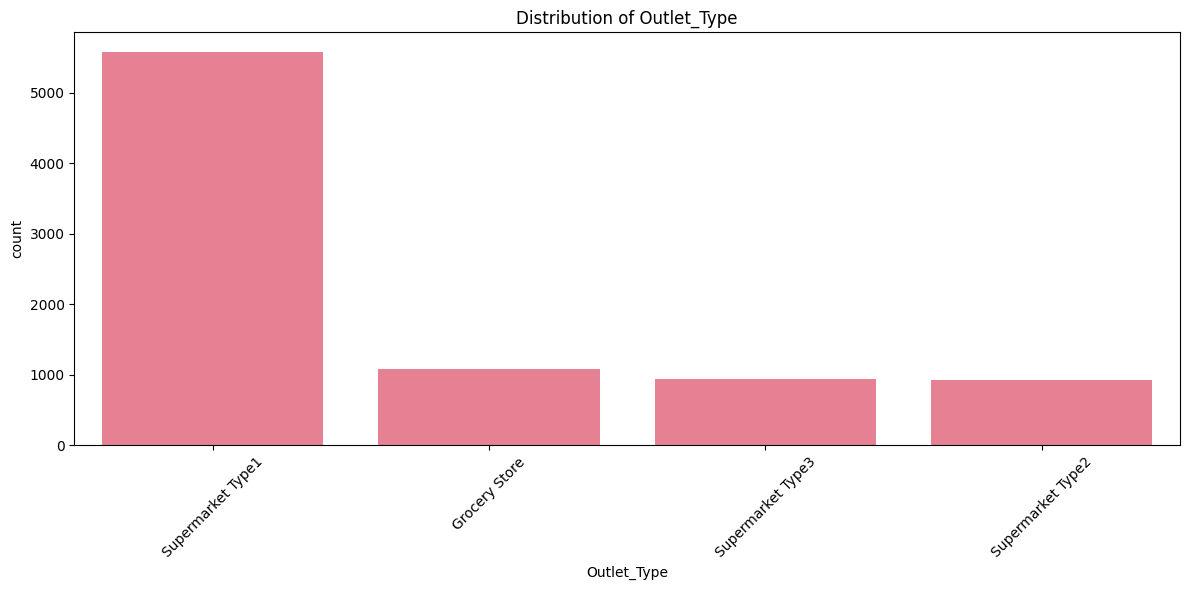


Outlet_Type - Value Counts:
Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64
--------------------------------------------------


In [12]:
# Step 5: Plot categorical distributions
plot_categorical_distributions(df)


CORRELATION ANALYSIS
Correlation Matrix:
                           Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                      1.000           -0.014     0.027   
Item_Visibility                 -0.014            1.000    -0.001   
Item_MRP                         0.027           -0.001     1.000   
Outlet_Establishment_Year       -0.012           -0.075     0.005   
Item_Outlet_Sales                0.014           -0.129     0.568   

                           Outlet_Establishment_Year  Item_Outlet_Sales  
Item_Weight                                   -0.012              0.014  
Item_Visibility                               -0.075             -0.129  
Item_MRP                                       0.005              0.568  
Outlet_Establishment_Year                      1.000             -0.049  
Item_Outlet_Sales                             -0.049              1.000  


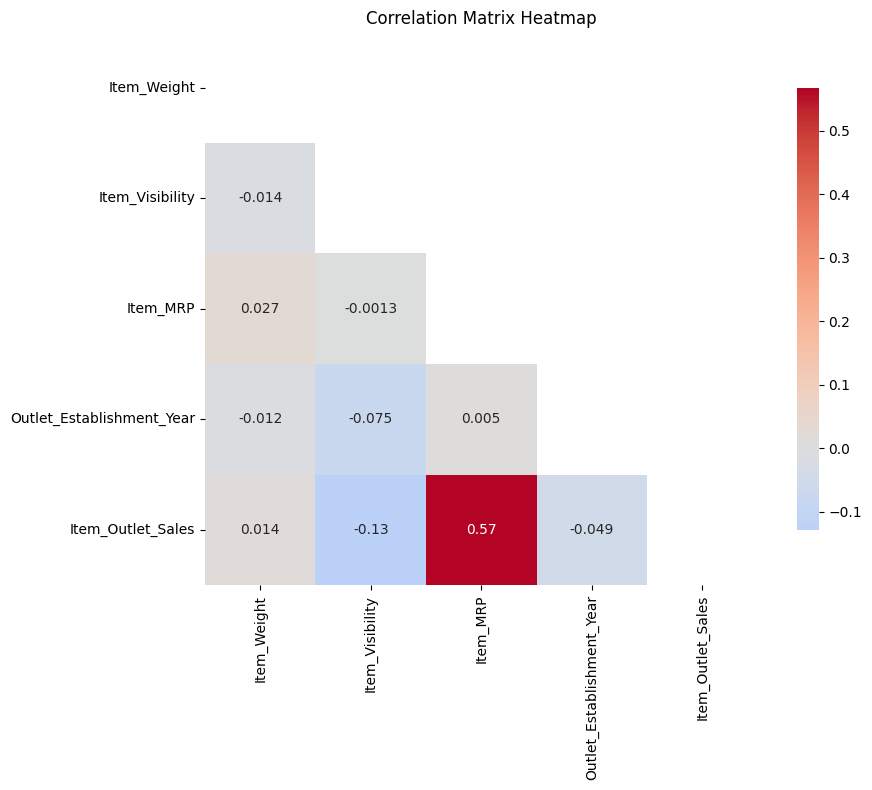


Highly correlated pairs (|correlation| > 0.5):
Item_MRP <-> Item_Outlet_Sales: 0.568


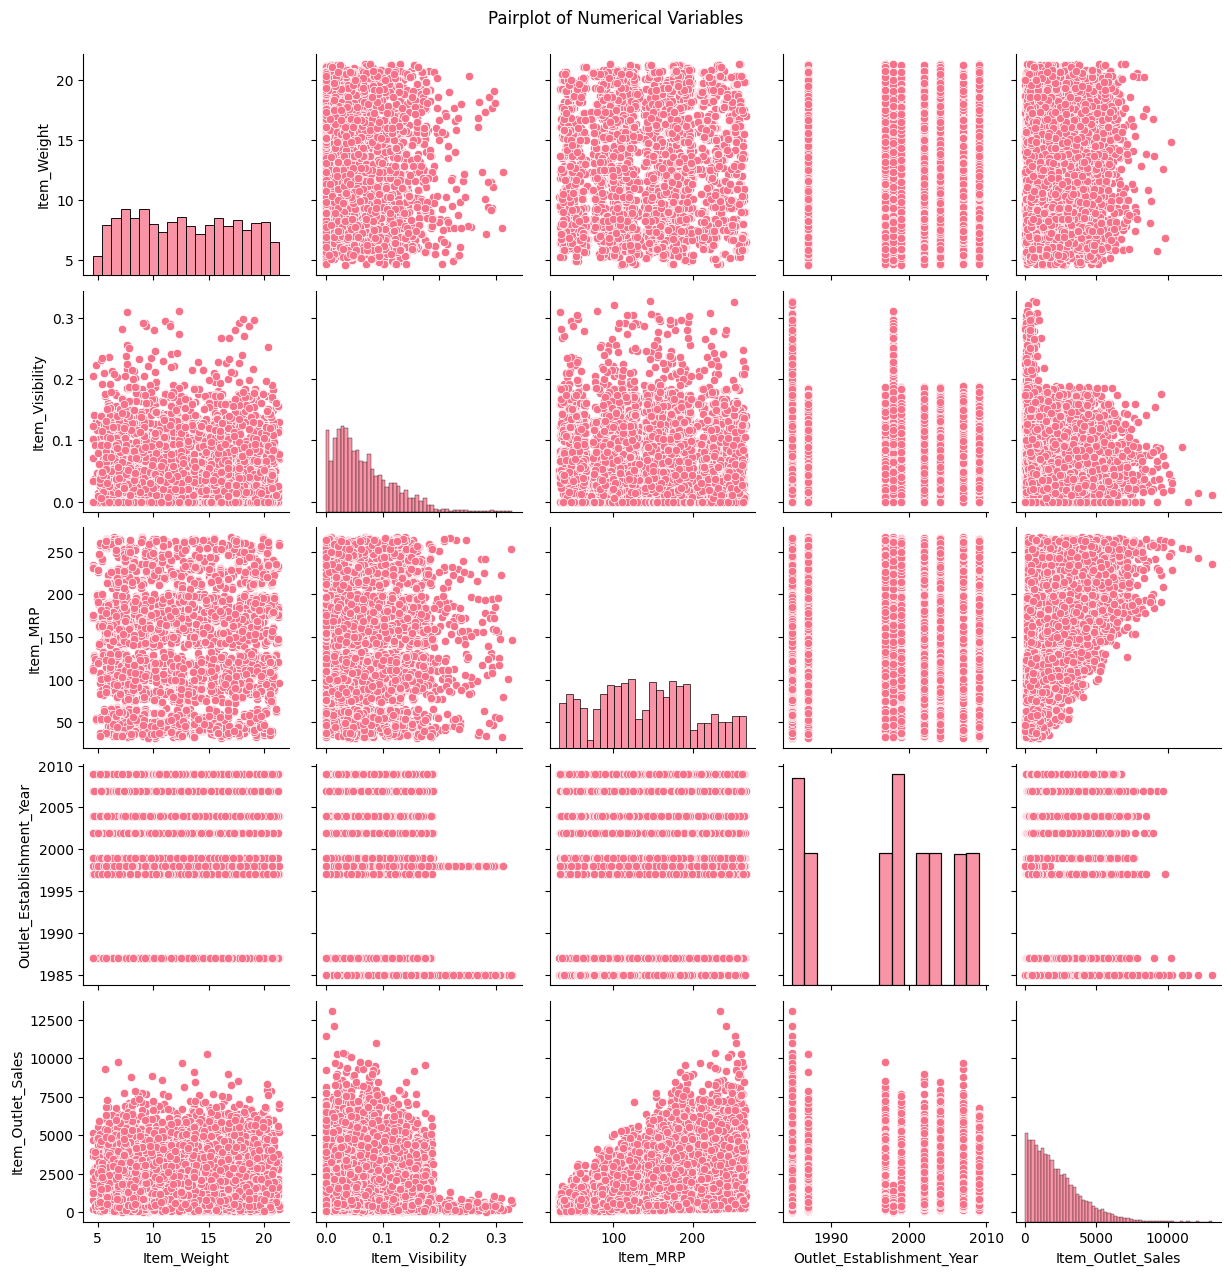

In [13]:
# Step 6: Analyze correlations
analyze_correlations(df)


TARGET VARIABLE ANALYSIS: Item_Outlet_Sales
Target Variable Statistics:
count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64


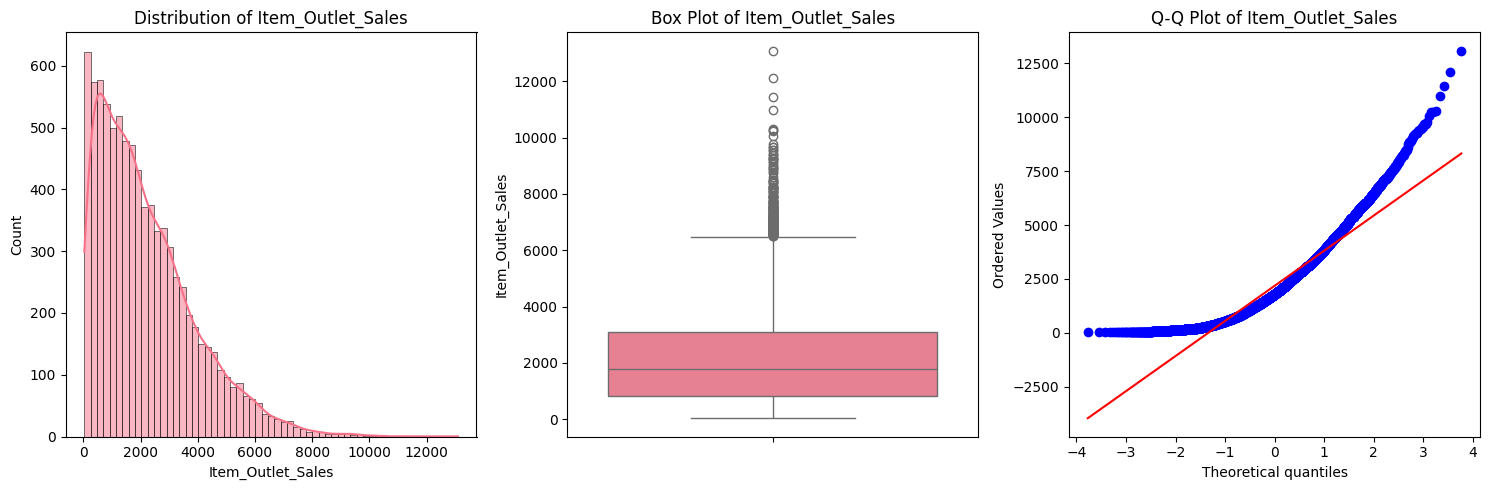

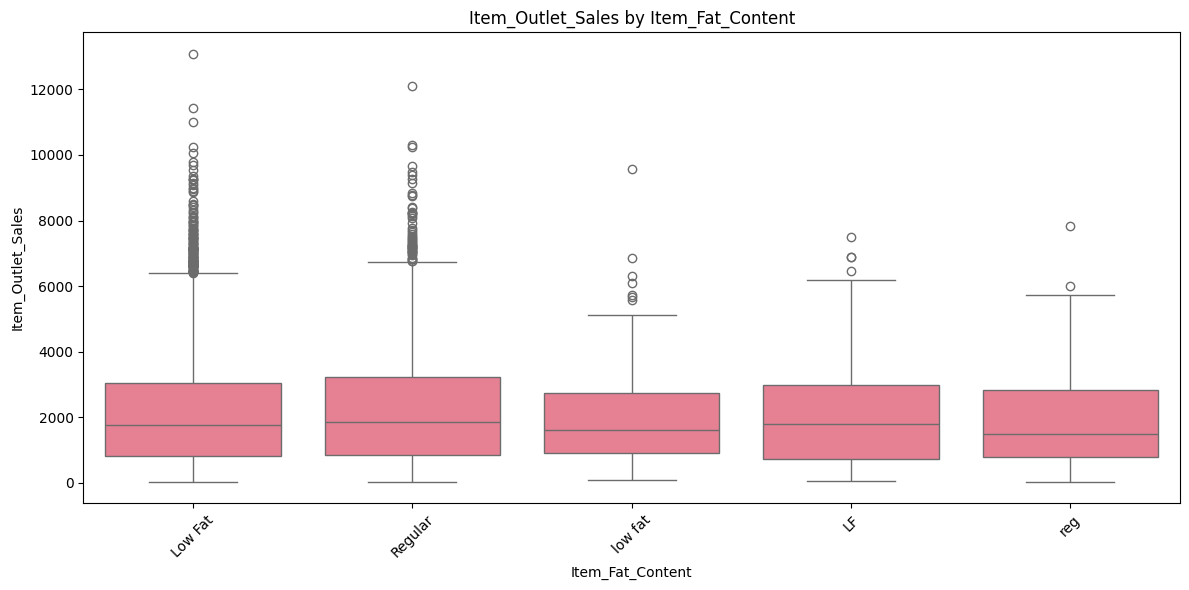

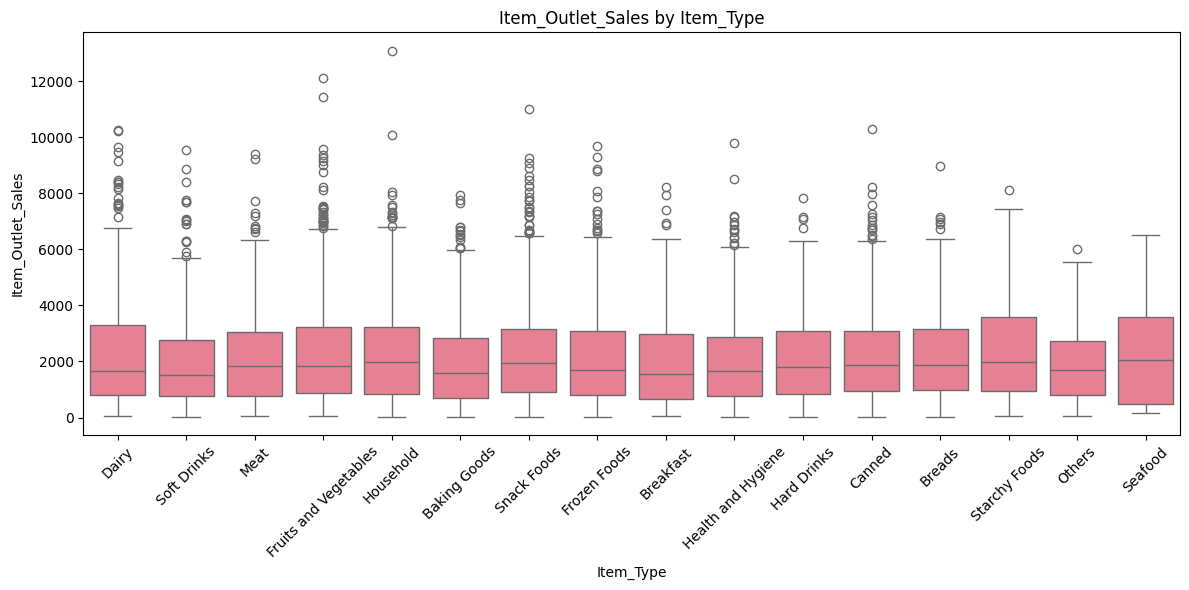

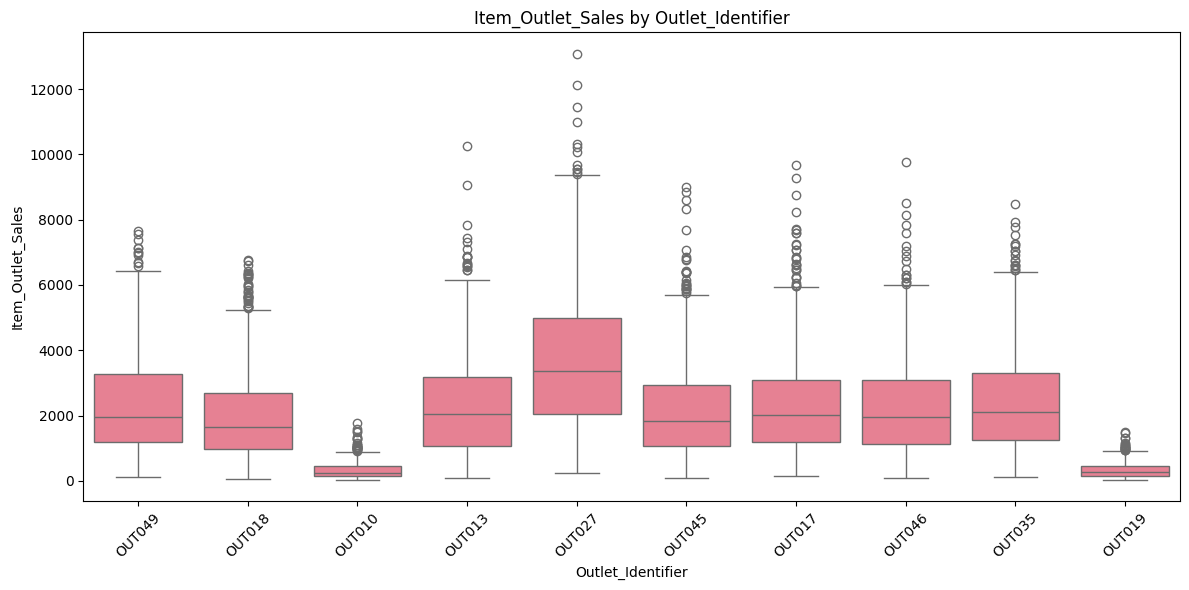

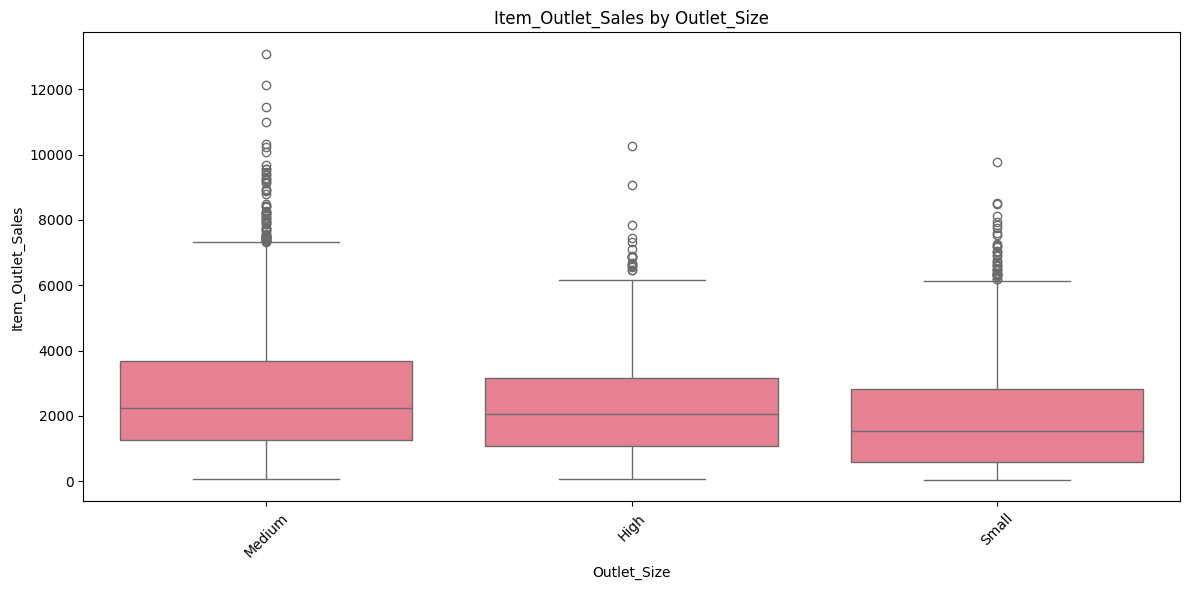

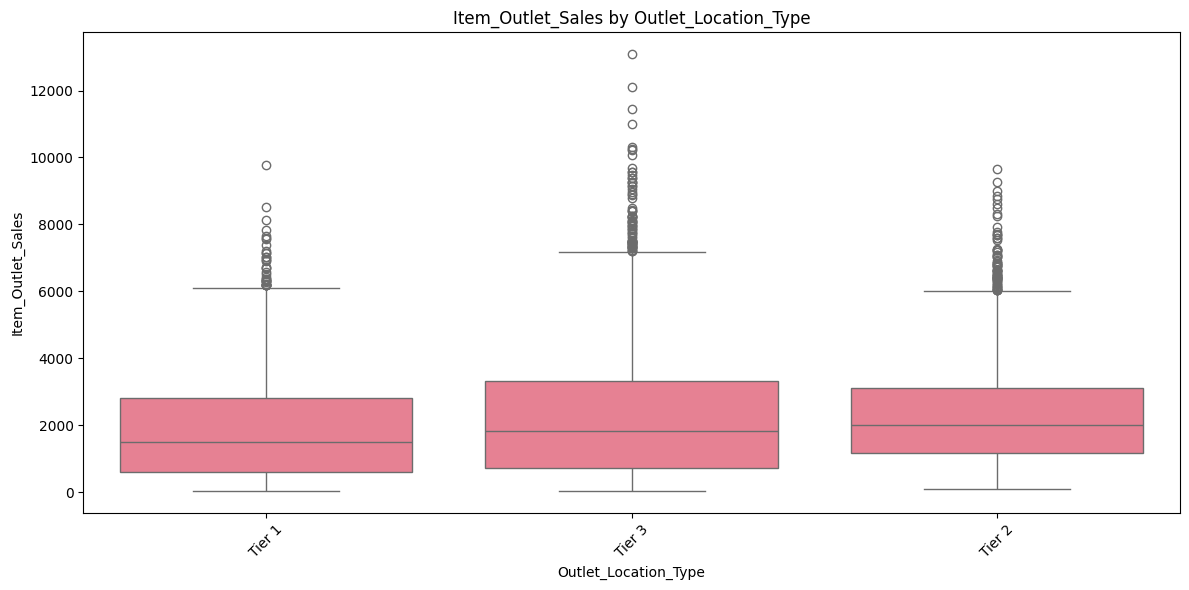

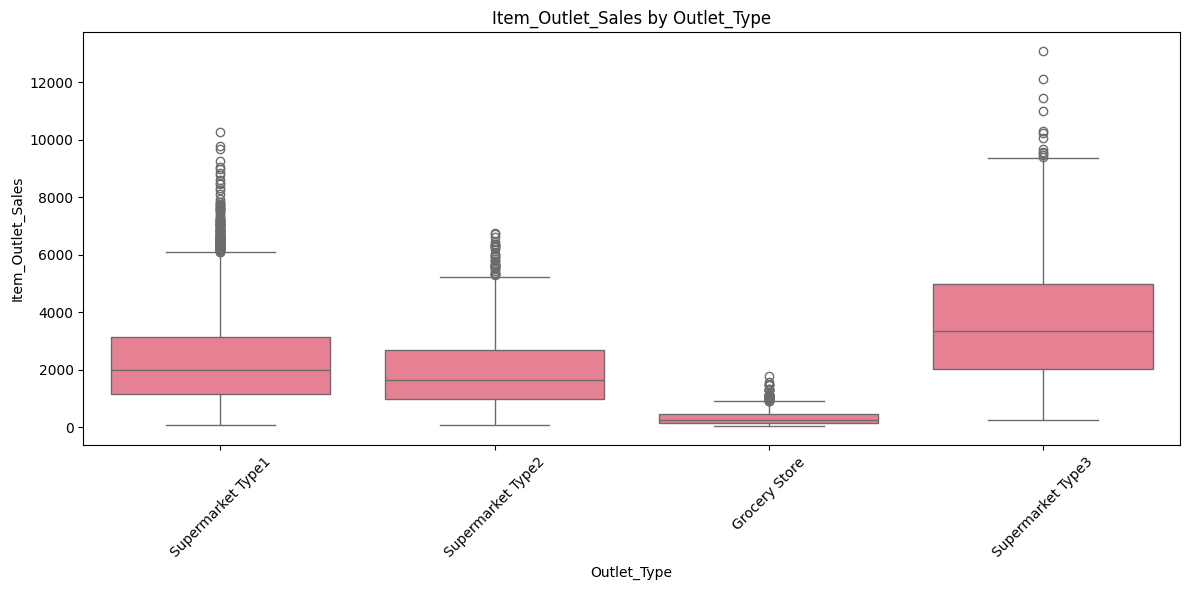

In [14]:
# Step 7: Analyze target variable
analyze_target_variable(df, TARGET_COLUMN)

In [15]:
# Step 8: Detect outliers
detect_outliers(df)


OUTLIER DETECTION
Outlier Summary (using IQR method):
                      Column  Outlier_Count  Outlier_Percentage  Lower_Bound  \
0                Item_Weight              0            0.000000    -3.340625   
1            Item_Visibility            144            1.689546    -0.074404   
2                   Item_MRP              0            0.000000   -43.899300   
3  Outlet_Establishment_Year              0            0.000000  1961.500000   
4          Item_Outlet_Sales            186            2.182330 -2566.326100   

   Upper_Bound  
0    28.964375  
1     0.195979  
2   323.369500  
3  2029.500000  
4  6501.869900  


In [16]:
# Step 9: Create interactive plots
create_interactive_plots(df, TARGET_COLUMN)


INTERACTIVE VISUALIZATIONS
